## Libraries and Settings

In [3]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/DataAnalyticsLN/Exploratory Data Analysis (EDA)


## Univariate non graphical exploratory data analysis (EDA)

### Importing the combined data

In [4]:
#Read and select variables
df_orig = pd.read_csv('combined.csv')[['country_name','year','gdp','total_refugees']]

#Number of rows and columns
print(df_orig.shape)

#Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

#Remove missing values
df_orig = df_orig.dropna()
df_orig.head(50)


(253, 4)


,country_name,year,gdp,total_refugees
0,France,2001,1.370377e+12,6036
1,France,2002,1.492428e+12,5947
2,France,2003,1.835096e+12,5539
3,France,2004,2.109792e+12,5788
4,France,2005,2.192146e+12,5912
5,France,2006,2.317862e+12,6084
6,France,2007,2.655817e+12,6336
7,France,2008,2.926803e+12,13674
8,France,2009,2.700076e+12,15608
9,France,2010,2.646230e+12,17248


### Quantiles original values

In [5]:
df_orig[['gdp', 'total_refugees']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.95]).round(2)


,gdp,total_refugees
0.05,1.996427e+11,111.85
0.10,2.300326e+11,1049.70
0.25,4.361440e+11,7375.25
0.50,1.489998e+12,42595.50
0.75,2.811134e+12,102212.00
0.95,1.595956e+13,320019.30


### Shape (number of rows and columns)

In [6]:
print(df_orig.shape)

(230, 4)


### Data types

In [7]:
df_orig.dtypes

country_name       object
year                int64
gdp               float64
total_refugees      int64
dtype: object

### Summary statistics of numeric variables

In [8]:
df_orig.describe()

,year,gdp,total_refugees
count,230.000000,2.300000e+02,2.300000e+02
mean,2012.000000,3.070335e+12,1.111135e+05
std,6.647717,5.057671e+12,2.675771e+05
min,2001.000000,1.216041e+11,1.500000e+01
25%,2006.000000,4.361440e+11,7.375250e+03
50%,2012.000000,1.489998e+12,4.259550e+04
75%,2018.000000,2.811134e+12,1.022120e+05
max,2023.000000,2.772071e+13,2.454276e+06


### Statistical measures (min, max, mead, median, count) for selected variables

In [9]:
#GDP
print('GDP:',
      'Count:', round(df_orig.gdp.count(), 1),
      'Min:', round(df_orig.gdp.min(), 1),
      'Max:', round(df_orig.gdp.max(), 1),
      'Mean:', round(df_orig.gdp.mean(), 1),
      'Median:', round(df_orig.gdp.median(), 1),
      'Std:', round(df_orig.gdp.std(), 1))

# Refugees
print('Refugees:',
      'Count:', round(df_orig.total_refugees.count(), 1),
      'Min:', round(df_orig.total_refugees.min(), 1),
      'Max:', round(df_orig.total_refugees.max(), 1),
      'Mean:', round(df_orig.total_refugees.mean(), 1),
      'Median:', round(df_orig.total_refugees.median(), 1),
      'Std:', round(df_orig.total_refugees.std(), 1))

GDP: Count: 230 Min: 121604107165.0 Max: 27720709000000.0 Mean: 3070334614603.1 Median: 1489998207811.8 Std: 5057671121604.9
Refugees: Count: 230 Min: 15 Max: 2454276 Mean: 111113.5 Median: 42595.5 Std: 267577.1


In [10]:
#GDP per Country
gdp_per_country = df_orig.groupby('country_name')['gdp'].mean().sort_values(ascending=False)
# display 
print(gdp_per_country)

#Refugees per Country
refugees_per_country = df_orig.groupby('country_name')['total_refugees'].mean().sort_values(ascending=False)
# display
print(refugees_per_country)


country_name
United States     1.716628e+13
Germany           3.501925e+12
United Kingdom    2.680728e+12
France            2.519390e+12
Italy             1.987471e+12
Spain             1.293616e+12
Switzerland       6.109075e+11
Sweden            4.886636e+11
Greece            2.342362e+11
Portugal          2.201246e+11
Name: gdp, dtype: float64
country_name
Germany           616507.826087
Sweden            110682.173913
United Kingdom     94662.086957
United States      71026.652174
Italy              59673.608696
France             49705.478261
Greece             46667.826087
Switzerland        31195.913043
Spain              25790.608696
Portugal            5222.608696
Name: total_refugees, dtype: float64


### Skewness

In [11]:
df_orig[['gdp', 'total_refugees']].skew()

gdp               2.872484
total_refugees    5.717763
dtype: float64

### Kurtosis

In [12]:
df_orig[['gdp', 'total_refugees']].kurtosis()

gdp                7.898314
total_refugees    38.940207
dtype: float64

### Extreme values

In [40]:
# low gdp
df_orig[df_orig['gdp']<=150000000000].sort_values(by='gdp', ascending=True)

,country_name,year,gdp,total_refugees
92,Portugal,2001,1.216041e+11,83
46,Greece,2001,1.320505e+11,6101
93,Portugal,2002,1.347956e+11,78


In [38]:
# low refugees
df_orig[df_orig['total_refugees']<=100].sort_values(by='total_refugees', ascending=True)

,country_name,year,gdp,total_refugees
97,Portugal,2006,2.087564e+11,15
98,Portugal,2007,2.404961e+11,32
96,Portugal,2005,1.972539e+11,37
101,Portugal,2010,2.384439e+11,39
99,Portugal,2008,2.634164e+11,46
94,Portugal,2003,1.652262e+11,54
95,Portugal,2004,1.893821e+11,54
100,Portugal,2009,2.446678e+11,56
93,Portugal,2002,1.347956e+11,78
92,Portugal,2001,1.216041e+11,83


In [42]:
# high gdp
df_orig[df_orig['gdp']>=15000000000000].sort_values(by='gdp', ascending=False)

,country_name,year,gdp,total_refugees
252,United States,2023,2.772071e+13,148968
251,United States,2022,2.600689e+13,115213
250,United States,2021,2.368117e+13,92745
248,United States,2019,2.153998e+13,67406
249,United States,2020,2.135410e+13,71490
247,United States,2018,2.065652e+13,63492
246,United States,2017,1.961210e+13,58519
245,United States,2016,1.880491e+13,50139
244,United States,2015,1.829502e+13,42075
243,United States,2014,1.760814e+13,33962


In [43]:
# high refugees
df_orig[df_orig['total_refugees']>=1000000].sort_values(by='gdp', ascending=False)

,country_name,year,gdp,total_refugees
45,Germany,2023,4.525704e+12,2454276
43,Germany,2021,4.348297e+12,1156549
44,Germany,2022,4.163596e+12,1998968
40,Germany,2018,4.052008e+12,1070655
41,Germany,2019,3.957208e+12,1095077
42,Germany,2020,3.940143e+12,1106057
39,Germany,2017,3.763092e+12,1044943


## Multivariate non graphical exploratory data analysis (EDA)

### Cross-tabulation

In [17]:
cross_tab = pd.crosstab(
    index=df_orig['country_name'],
    columns=df_orig['year'],
    values=df_orig['total_refugees'],
    aggfunc='sum'
)

#Display the cross tab
print(cross_tab)

year             2001    2002    2003    2004    2005    2006    2007    2008  \
country_name                                                                    
France           6036    5947    5539    5788    5912    6084    6336   13674   
Germany         20228  277159  260911  234892  213628  115789  118980  276830   
Greece           6101    3194    4996    7945    6860    6189    7196    9112   
Italy            1981    2251    2310    3068    3453    4135    6230   16334   
Portugal           83      78      54      54      37      15      32      46   
Spain             834     860     700     719     655     632    1190    1236   
Sweden          37099   45735   44830   41186   36327   42617  100182   97312   
Switzerland      8830    9469    9465    8369    8208    9552   19400   24400   
United Kingdom  35415   50965   57893   59990   61285   62379   63883  126052   
United States   98229   98324  100479   94777   85318  155551   59514   55744   

year              2009    2

### Pivot tables

In [18]:

pivot_table = pd.pivot_table(
    df_orig,
    values='total_refugees', 
    index='country_name', 
    columns='year', 
    aggfunc='sum',
    fill_value=0
)

# Display the pivot table
print(pivot_table)

year             2001    2002    2003    2004    2005    2006    2007    2008  \
country_name                                                                    
France           6036    5947    5539    5788    5912    6084    6336   13674   
Germany         20228  277159  260911  234892  213628  115789  118980  276830   
Greece           6101    3194    4996    7945    6860    6189    7196    9112   
Italy            1981    2251    2310    3068    3453    4135    6230   16334   
Portugal           83      78      54      54      37      15      32      46   
Spain             834     860     700     719     655     632    1190    1236   
Sweden          37099   45735   44830   41186   36327   42617  100182   97312   
Switzerland      8830    9469    9465    8369    8208    9552   19400   24400   
United Kingdom  35415   50965   57893   59990   61285   62379   63883  126052   
United States   98229   98324  100479   94777   85318  155551   59514   55744   

year              2009    2

### Correlation matrix

In [19]:
#create a correlation matrix
df_orig[['gdp', 'total_refugees']].corr()


,gdp,total_refugees
gdp,1.000000,0.067917
total_refugees,0.067917,1.000000


### Covariance matrix

In [20]:
#create a covariance matrix
df_orig[['gdp', 'total_refugees']].cov()

,gdp,total_refugees
gdp,2.558004e+25,9.191320e+16
total_refugees,9.191320e+16,7.159752e+10


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

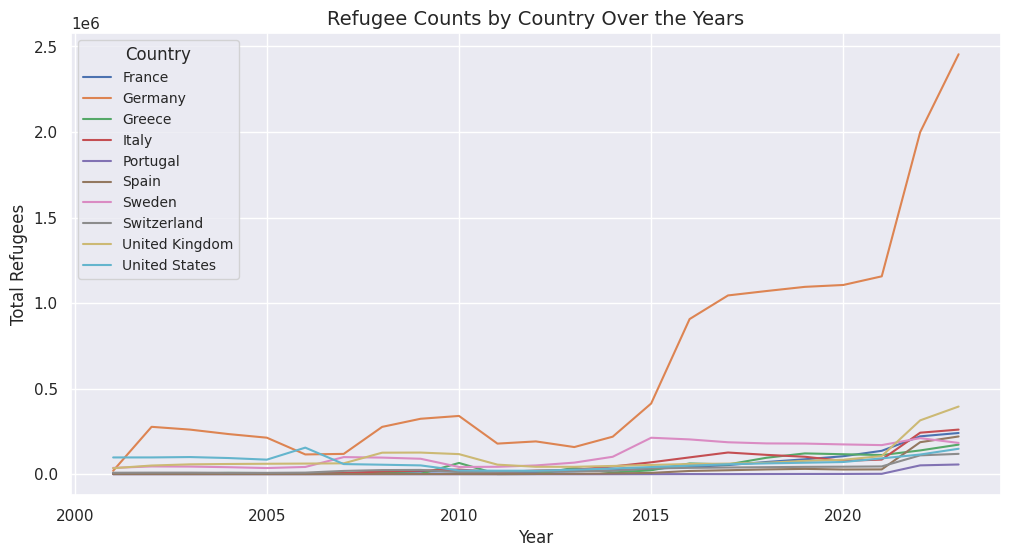

In [21]:
#group by country and year
grouped_data = df_orig.groupby(['country_name', 'year'])['total_refugees'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
for country in grouped_data['country_name'].unique():
    country_data = grouped_data[grouped_data['country_name'] == country]
    plt.plot(country_data['year'], country_data['total_refugees'], label=country)

# Add chart elements
plt.title("Refugee Counts by Country Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.legend(title="Country", fontsize=10)
plt.grid(True)
plt.show()

### Scatterplotmatrix

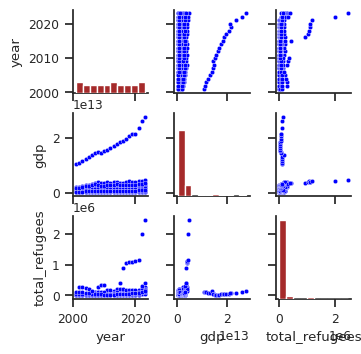

In [22]:
#Create a scatterplotmatrix of the numeric variables in the dataset
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_orig[['country_name', 'year', 'gdp', 'total_refugees']], height=1.2, aspect=1)
g.map_upper(sns.scatterplot, color='blue', s=10)
g.map_lower(sns.scatterplot, color='blue', s=10)
g.map_diag(plt.hist, color='brown')

### Boxplot (seaborn)

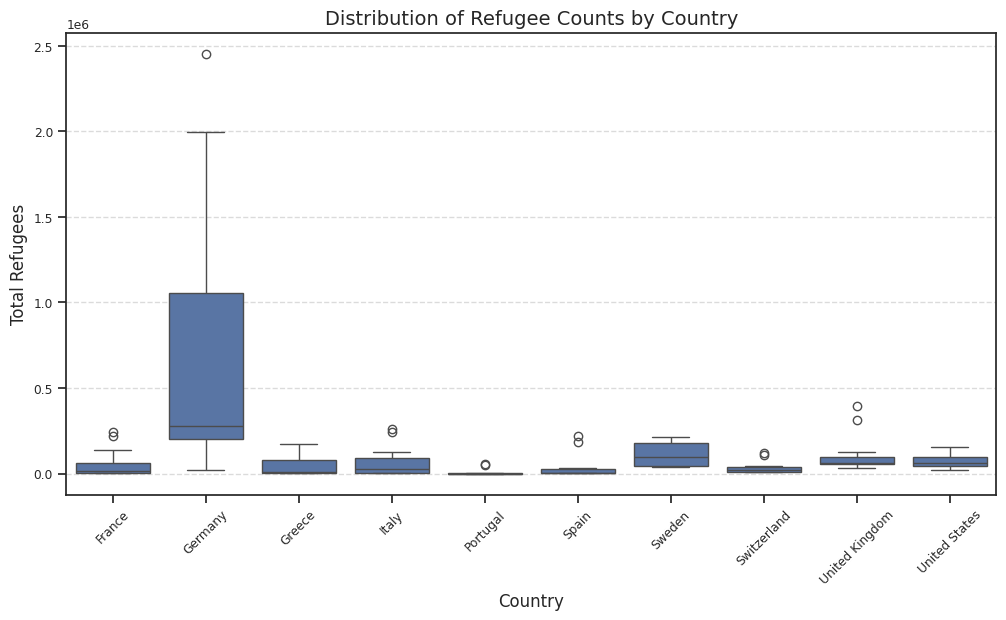

In [23]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_orig, x='country_name', y='total_refugees')

# Add chart elements
plt.title("Distribution of Refugee Counts by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

### Histogram (matplotlib) 

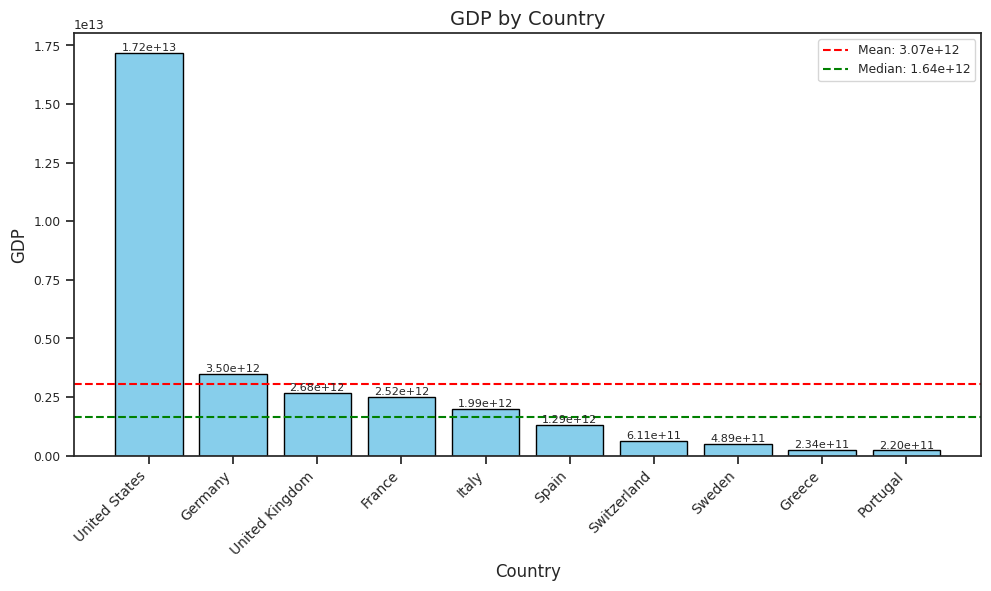

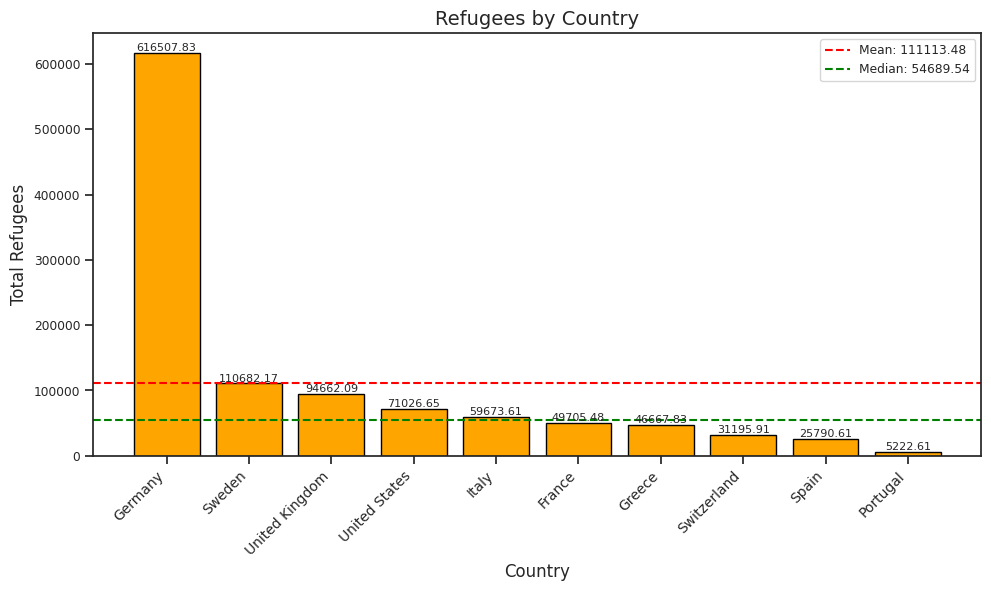

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# GDP per Country
gdp_per_country = df_orig.groupby('country_name')['gdp'].mean().sort_values(ascending=False)
# Calculate mean and median of GDP
mean_gdp = gdp_per_country.mean()
median_gdp = gdp_per_country.median()
# Plot bar chart for GDP by Country
plt.figure(figsize=(10, 6))
plt.bar(gdp_per_country.index, gdp_per_country.values, color='skyblue', edgecolor='black')
# Add mean and median lines
plt.axhline(mean_gdp, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_gdp:.2e}')
plt.axhline(median_gdp, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_gdp:.2e}')
# Add labels to the bars
for i, value in enumerate(gdp_per_country.values):
    plt.text(i, value, f'{value:.2e}', ha='center', va='bottom', fontsize=8)

plt.title('GDP by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.legend()
plt.show()

# Refugees per Country
refugees_per_country = df_orig.groupby('country_name')['total_refugees'].mean().sort_values(ascending=False)
# Calculate mean and median of Refugees
mean_refugees = refugees_per_country.mean()
median_refugees = refugees_per_country.median()
# Plot bar chart for Refugees by Country
plt.figure(figsize=(10, 6))
plt.bar(refugees_per_country.index, refugees_per_country.values, color='orange', edgecolor='black')
# Add mean and median lines
plt.axhline(mean_refugees, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_refugees:.2f}')
plt.axhline(median_refugees, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_refugees:.2f}')
# Add labels to the bars
for i, value in enumerate(refugees_per_country.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)
plt.title('Refugees by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Refugees', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.legend()
plt.show()

### Density plot (seaborn)

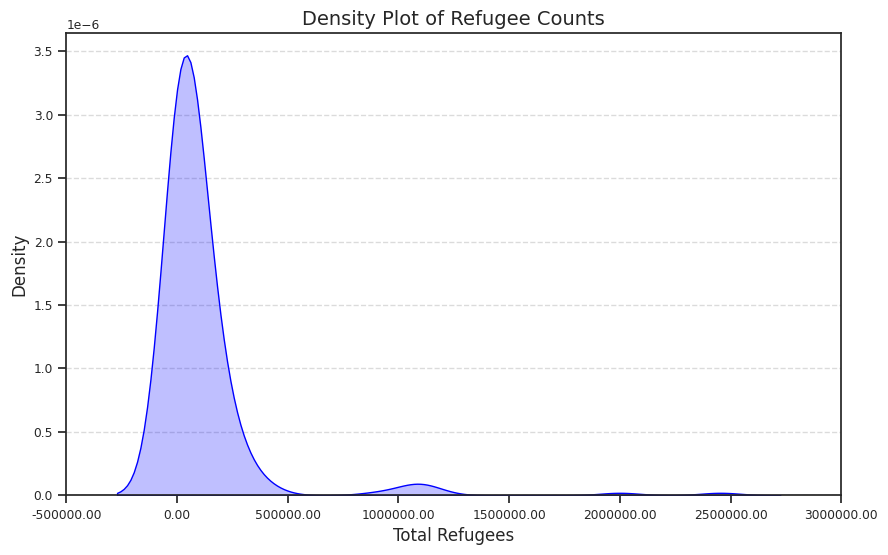

In [25]:
# Create a density plot for total refugees
plt.figure(figsize=(10, 6))
sns.kdeplot(df_orig['total_refugees'], shade=True, color='blue')
plt.title("Density Plot of Refugee Counts", fontsize=14)
plt.xlabel("Total Refugees", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis tick labels with more decimal places
plt.gca().set_xticks(plt.gca().get_xticks())  # Get current ticks
plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])  # Format with 3 decimal places

plt.show()

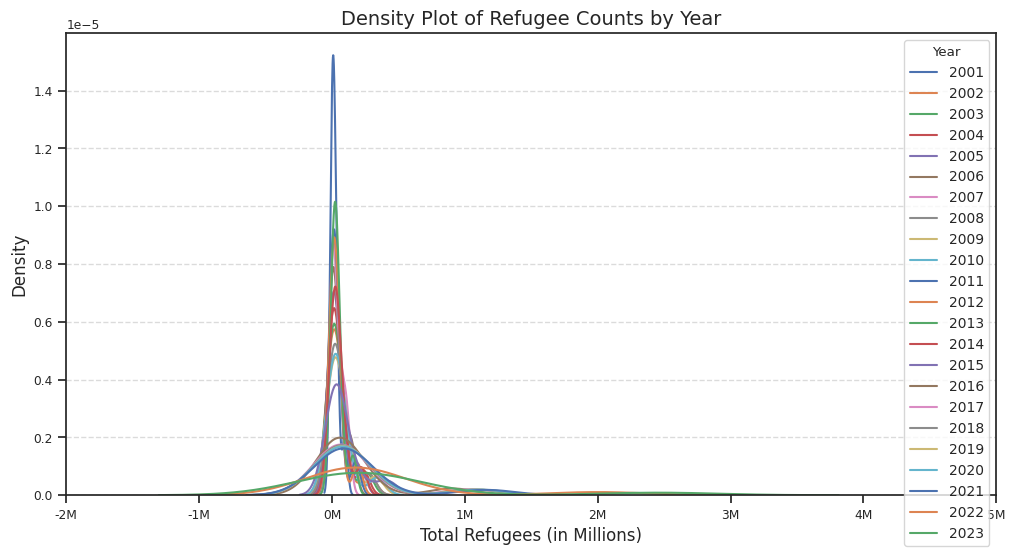

In [26]:
# Create a density plot grouped by year
plt.figure(figsize=(12, 6))

# Loop through unique years and plot their density
for year in sorted(df_orig['year'].unique()):
    subset = df_orig[df_orig['year'] == year]['total_refugees']
    sns.kdeplot(subset, label=year, linewidth=1.5)

# Update x-axis to display in thousands or millions
plt.gca().set_xticks(plt.gca().get_xticks())  # Update ticks to match formatting
plt.gca().set_xticklabels([f'{int(x/1e6)}M' for x in plt.gca().get_xticks()])

plt.title("Density Plot of Refugee Counts by Year", fontsize=14)
plt.xlabel("Total Refugees (in Millions)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Year", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### Quantile-Quantile plot

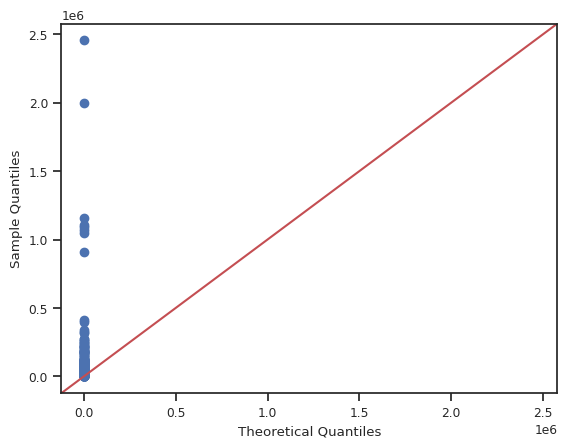

In [27]:
#create a qq plot
sm.qqplot(df_orig['total_refugees'], line ='45')
py.show()


### Barchart (matplotlib)

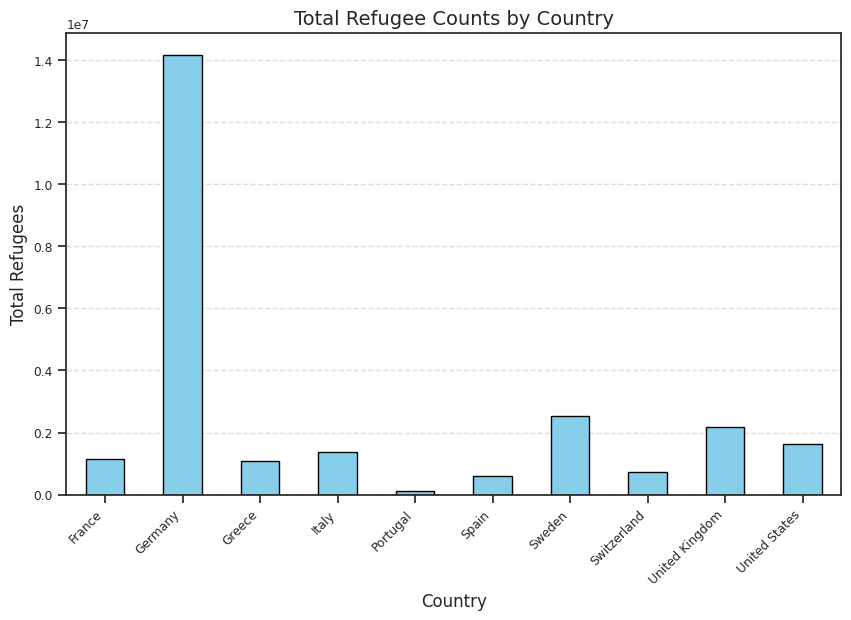

In [28]:
# Aggregate total refugees by country
refugee_counts_by_country = df_orig.groupby('country_name')['total_refugees'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
refugee_counts_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Refugee Counts by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Piechart (matplotlib)

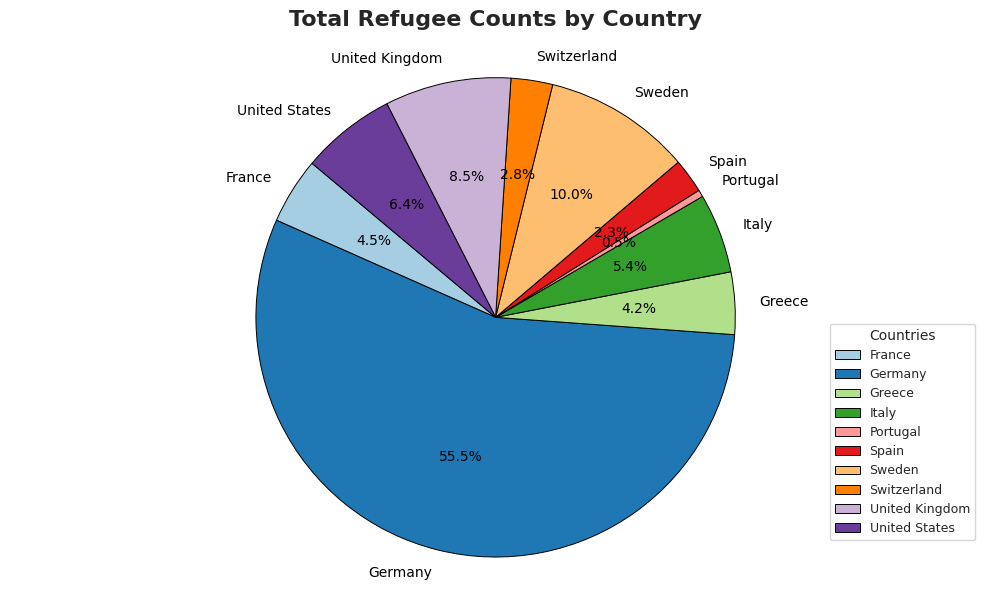

In [29]:
# Aggregate total refugees by country
refugee_counts_by_country = df_orig.groupby('country_name')['total_refugees'].sum()

# Create a pie chart
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(refugee_counts_by_country)))  # Use a color map for visually pleasing colors

plt.pie(
    refugee_counts_by_country, 
    labels=refugee_counts_by_country.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,  # Add colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.7},  # Add borders to wedges
    textprops={'fontsize': 10, 'color': 'black'}  # Improve text readability
)

# Add a title with better formatting
plt.title(
    "Total Refugee Counts by Country", 
    fontsize=16, 
    fontweight='bold', 
    pad=20  # Add padding above the chart
)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a legend to improve clarity
plt.legend(
    loc="best", 
    fontsize=9, 
    title="Countries", 
    title_fontsize=10, 
    bbox_to_anchor=(1, 0.5)  # Place the legend outside the pie chart
)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

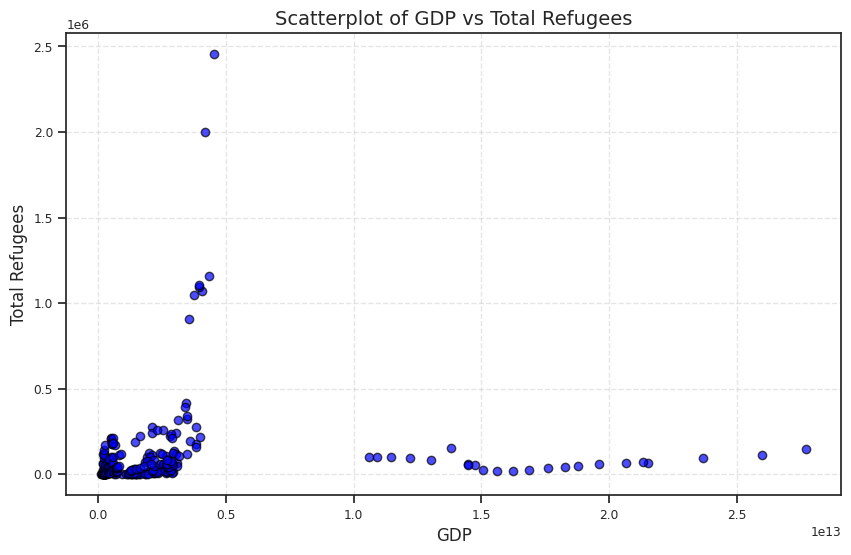

In [30]:
import matplotlib.pyplot as plt

# Create a scatterplot for GDP vs. Total Refugees
plt.figure(figsize=(10, 6))
plt.scatter(df_orig['gdp'], df_orig['total_refugees'], alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.title("Scatterplot of GDP vs Total Refugees", fontsize=14)
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Scatterplot with regression line

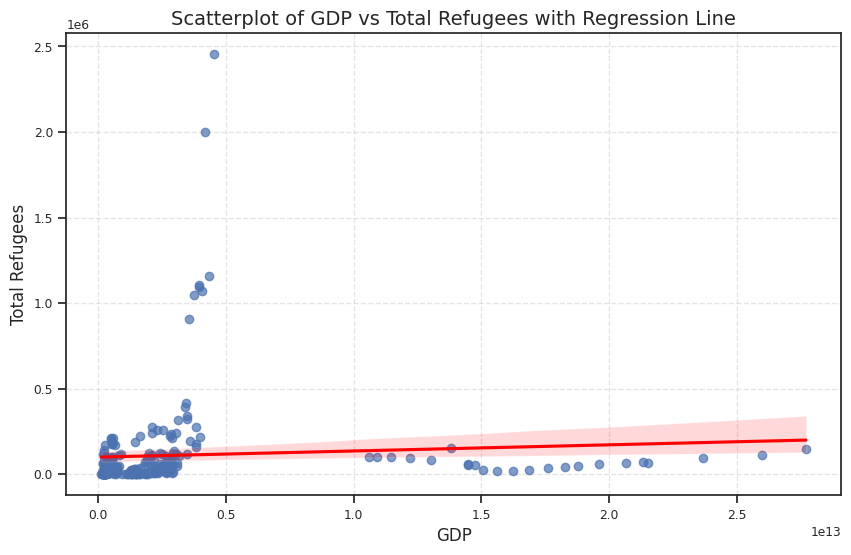

In [31]:

# Create a scatterplot with regression line for GDP vs Total Refugees
plt.figure(figsize=(10, 6))
sns.regplot(data=df_orig, x='gdp', y='total_refugees', scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

# Add labels and title
plt.title("Scatterplot of GDP vs Total Refugees with Regression Line", fontsize=14)
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Scatterplot-matrix (seaborn)

<Figure size 1000x800 with 0 Axes>

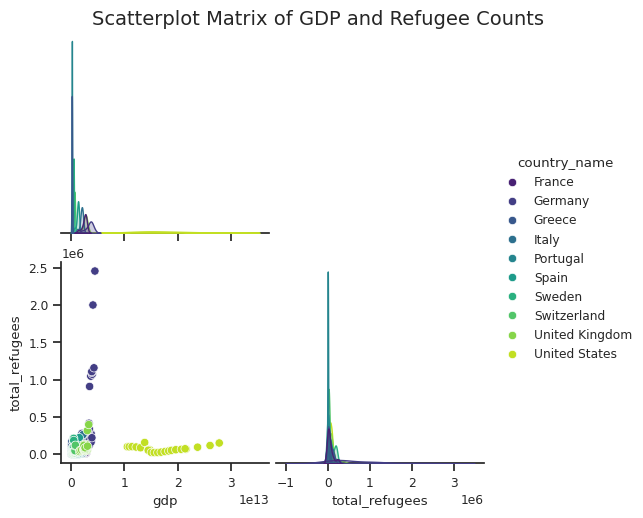

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot matrix
plt.figure(figsize=(10, 8))
sns.pairplot(df_orig, vars=['gdp', 'total_refugees'], hue='country_name', palette='viridis', corner=True)

# Show the plot
plt.suptitle("Scatterplot Matrix of GDP and Refugee Counts", y=1.02, fontsize=14)
plt.show()


### Hexagonal binning plot (matplotlib)

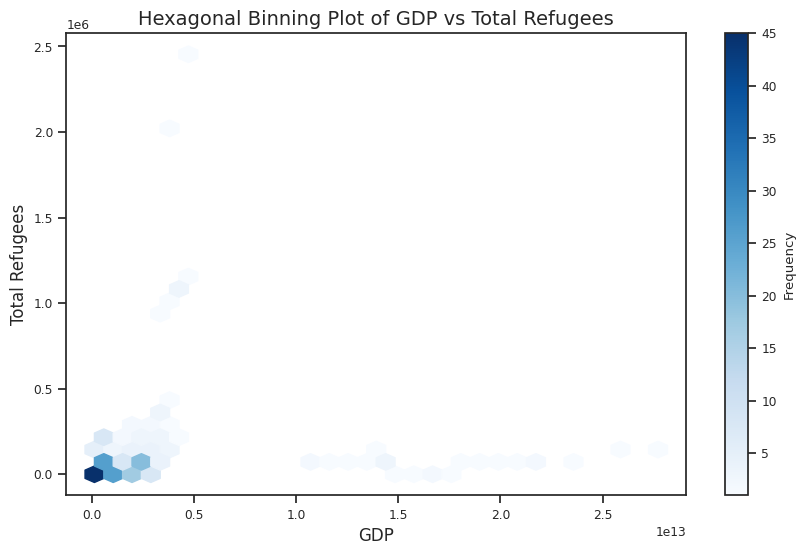

In [33]:
import matplotlib.pyplot as plt

# Create a hexbin plot for GDP vs. Total Refugees
plt.figure(figsize=(10, 6))
plt.hexbin(df_orig['gdp'], df_orig['total_refugees'], gridsize=30, cmap='Blues', mincnt=1)

# Add color bar
cb = plt.colorbar(label='Frequency')

# Add labels and title
plt.title("Hexagonal Binning Plot of GDP vs Total Refugees", fontsize=14)
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.show()


### Correlation heatmap (seaborn)

<Axes: >

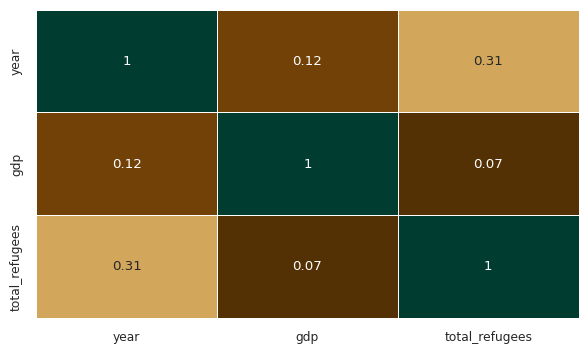

In [34]:
 # Set font size for plot
sns.set(font_scale=0.8)
# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_orig[['year', 'gdp', 'total_refugees']].corr().round(2) 
 # Plot heatmap
sns.heatmap(corr, cmap="BrBG", annot=True, cbar=False, linewidths=0.5)

### Bubble plot (seaborn)

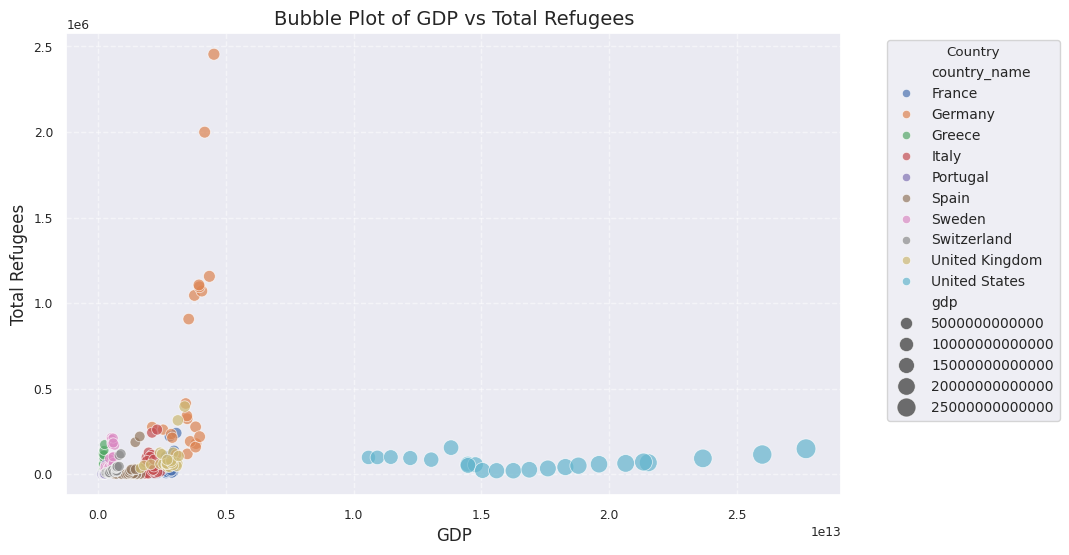

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bubble plot for GDP vs. Total Refugees, with bubble size proportional to GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orig, x='gdp', y='total_refugees', size='gdp', hue='country_name', sizes=(50, 200), alpha=0.7)

# Add labels and title
plt.title("Bubble Plot of GDP vs Total Refugees", fontsize=14)
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.legend(title="Country", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
